<a href="https://colab.research.google.com/github/bagusamandira/Text-Modeling/blob/main/TextClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. [LO1, LO2, LO3]
Di tahun 2023 terjadi kasus BSI yang mengalami serangan Ransomware, sehingga menggangu fungsi Bank ini secara nasional. Pengguna twitter (X) banyak mengunggah tweet memberikan respon terhadap kasus ini. Penasaran dengan apa saja yang dibicarakan user mengenai kasus ini di twitter (X), anda diminta melakukan pemodelan terhadap data kumpulan tweet pengguna dengan detail sebagai berikut:

In [ ]:
import pandas as pd
import numpy as np
import string
import zipfile
import os
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, silhouette_score
from google.colab import files
import regex
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## a.
[15%] Lakukan pengelompokan dengan menggunakan pendekatan clustering, silahkan ujicoba beberapa nilai cluster (k) yang mungkin anda peroleh dari data tersebut, berikan perbandingan silhoutte score sebagai justifikasi jumlah cluster (k) yang akan anda pilih.

In [ ]:
df2_raw = pd.read_csv('/content/data_2C.csv')
df2_raw

,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks
0,0,6881,https://twitter.com/koesmanagalang/status/1657...,2023-05-13 17:02:16+00:00,@myrnn_ @secgron @bankbsi_id sistem sama orang...,1657431076921544705,koesmanagalang,1,0,0,0,1657192354829451264,in,NaN,NaN,NaN,0
1,1,9209,https://twitter.com/muhammad_dlya/status/16572...,2023-05-13 07:14:32+00:00,@setyodiwantoro @ZakyFarid @RochmatPurwanto @b...,1657283168054181888,muhammad_dlya,1,0,0,0,1657217322447425538,eu,NaN,NaN,NaN,0
2,2,13665,https://twitter.com/NuriSeptiyani/status/16566...,2023-05-11 13:40:46+00:00,@Kebosananan @detikcom iya nasabah bank konven...,1656655591488761857,NuriSeptiyani,2,0,1,1,1656576231545131008,in,NaN,NaN,NaN,0
3,3,17281,https://twitter.com/MasYusuf_/status/165646539...,2023-05-11 01:04:59+00:00,@bankbsi_id Gimana sih Min ini kok gak bisa la...,1656465393014419456,MasYusuf_,1,0,1,0,1655807602104872960,in,NaN,NaN,NaN,0
4,4,12216,https://twitter.com/KepoomrR/status/1656901084...,2023-05-12 05:56:16+00:00,"@ssstef_ @bankbsi_id BCA Sy bisa nih kayaknya, 😅",1656901084693278720,KepoomrR,0,0,0,0,1656869834557378560,in,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,6095,23150,https://twitter.com/RemajaKurus/status/1655921...,2023-05-09 13:03:25+00:00,@izthmm @bankbsi_id cek di mbankingnya kak?,1655921416846602242,RemajaKurus,3,0,0,0,1655807602104872960,in,NaN,NaN,NaN,0
6096,6096,22972,https://twitter.com/_dinsky/status/16559316066...,2023-05-09 13:43:55+00:00,mobile banking dah kebuka tp ga bisa ngapa nga...,1655931606673264640,_dinsky,0,0,0,0,1655931606673264640,in,NaN,NaN,NaN,0
6097,6097,21780,https://twitter.com/Gustav33429353/status/1656...,2023-05-10 03:23:22+00:00,@detikfinance Kalau ga siap jadi BANK mending ...,1656137826583613442,Gustav33429353,0,0,0,0,1656113414375129088,in,NaN,NaN,NaN,0
6098,6098,19945,https://twitter.com/TriezoElBuho/status/165625...,2023-05-10 10:49:44+00:00,@bankbsi_id @rahayuririnn Kagak bisa anying,1656250160664682496,TriezoElBuho,0,0,0,0,1655777758180708355,in,NaN,NaN,NaN,0


Only use relevant data

In [ ]:
df2 = df2_raw[['Tweet']]
df2

,Tweet
0,@myrnn_ @secgron @bankbsi_id sistem sama orang...
1,@setyodiwantoro @ZakyFarid @RochmatPurwanto @b...
2,@Kebosananan @detikcom iya nasabah bank konven...
3,@bankbsi_id Gimana sih Min ini kok gak bisa la...
4,"@ssstef_ @bankbsi_id BCA Sy bisa nih kayaknya, 😅"
...,...
6095,@izthmm @bankbsi_id cek di mbankingnya kak?
6096,mobile banking dah kebuka tp ga bisa ngapa nga...
6097,@detikfinance Kalau ga siap jadi BANK mending ...
6098,@bankbsi_id @rahayuririnn Kagak bisa anying


In [ ]:
df2.isna().sum()

Tweet    0
dtype: int64

Text Preprocessing

In [ ]:
# Remove punctutation
def punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df2['clean'] = df2['Tweet'].apply(punctuation)

<ipython-input-21-eba33ba5fbe0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['Tweet'].apply(punctuation)


In [ ]:
# Remove emojis
def remove_emojis(text):
    if not isinstance(text, str):
        return text
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

df2['clean'] = df2['clean'].apply(remove_emojis)

<ipython-input-22-c17c2d3ba6cb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['clean'].apply(remove_emojis)


In [ ]:
#Remove miscellaneous and change string to lowercase
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*https?://\S*', '', text)
    text = re.sub(r'@\w+', "", text)
    text = re.sub(r'#\w+', "", text)
    text = re.sub(r'\d+', "", text)
    return text

df2['clean'] = df2['clean'].apply(clean_text)

<ipython-input-23-010dd6f1a538>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['clean'].apply(clean_text)


In [ ]:
# Stopwords
ind_stopwords = stopwords.words('indonesian')
def remove_stopwords(text):
    words = word_tokenize(text)
    words_without_stopwords = [word for word in words if word.lower() not in ind_stopwords]
    return ' '.join(words_without_stopwords)

df2['clean'] = df2['clean'].apply(remove_stopwords)

<ipython-input-24-a967a9274fe0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['clean'].apply(remove_stopwords)


In [ ]:
# Tokenization
def tokenize(text):
    return word_tokenize(text)

df2['clean'] = df2['clean'].apply(tokenize)

<ipython-input-25-969375ac40c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['clean'].apply(tokenize)


In [ ]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_words = [word_lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_words

df2['clean'] = df2['clean'].apply(lemmatize_text)

<ipython-input-26-a7f2697f9a79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clean'] = df2['clean'].apply(lemmatize_text)


Compare clean data to raw data

In [ ]:
df2.head()

,Tweet,clean
0,@myrnn_ @secgron @bankbsi_id sistem sama orang...,"[myrnn, secgron, bankbsiid, sistem, orangnya, ..."
1,@setyodiwantoro @ZakyFarid @RochmatPurwanto @b...,"[setyodiwantoro, zakyfarid, rochmatpurwanto, b..."
2,@Kebosananan @detikcom iya nasabah bank konven...,"[kebosananan, detikcom, iya, nasabah, bank, ko..."
3,@bankbsi_id Gimana sih Min ini kok gak bisa la...,"[bankbsiid, gimana, sih, min, gak, bsi, mobile..."
4,"@ssstef_ @bankbsi_id BCA Sy bisa nih kayaknya, 😅","[ssstef, bankbsiid, bca, sy, nih, kayaknya]"


Use clean data as x, convert to vectors

In [ ]:
# Word2vec
word2vec = Word2Vec(sentences=df2['clean'], vector_size=50, min_count=3)

In [ ]:
# Prep data for clustering
def get_document_vector(tokens):
    vector = [word2vec.wv[word] for word in tokens if word in word2vec.wv]
    if len(vector) == 0:
        return [0] * word2vec.vector_size
    return list(sum(vector) / len(vector))

df2['vector'] = df2['clean'].apply(get_document_vector)
X = np.array(list(df2['vector']))

<ipython-input-32-9bae35960a64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vector'] = df2['clean'].apply(get_document_vector)


## Text clustering

Tentukan jumlah cluster optimum dengan elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

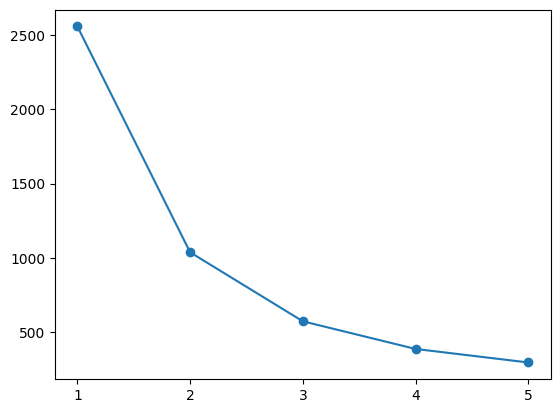

In [ ]:
#elbow method
ks = range(1,6)
inertias = []
for k in ks:
  model = KMeans(n_clusters = k)
  model.fit(X)
  inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xticks(ks)
plt.show()

Dari Hasil plot, k=3 optimum karena pada k>3 mengalami diminishing return

In [ ]:
model = KMeans(n_clusters = 3)
model.fit(X)
labels = model.labels_

df2['label'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-39-6fe71b08e189>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = labels


Melihat jumlah data di setiap cluster

In [ ]:
df2['label'].value_counts()

label
0    3029
1    1590
2    1481
Name: count, dtype: int64

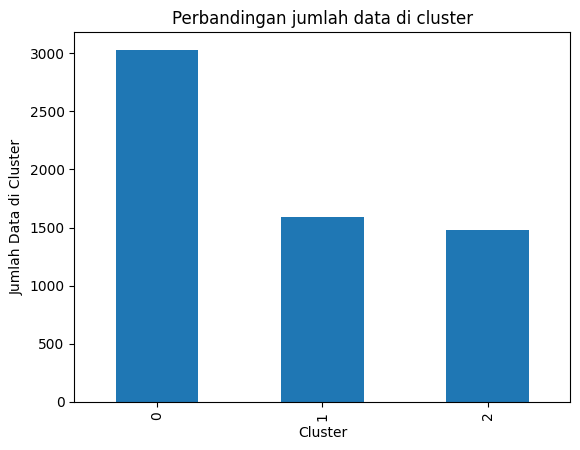

In [ ]:
df2['label'].value_counts().plot.bar()
plt.title('Perbandingan jumlah data di cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data di Cluster')
plt.show()

Visualize the clusters

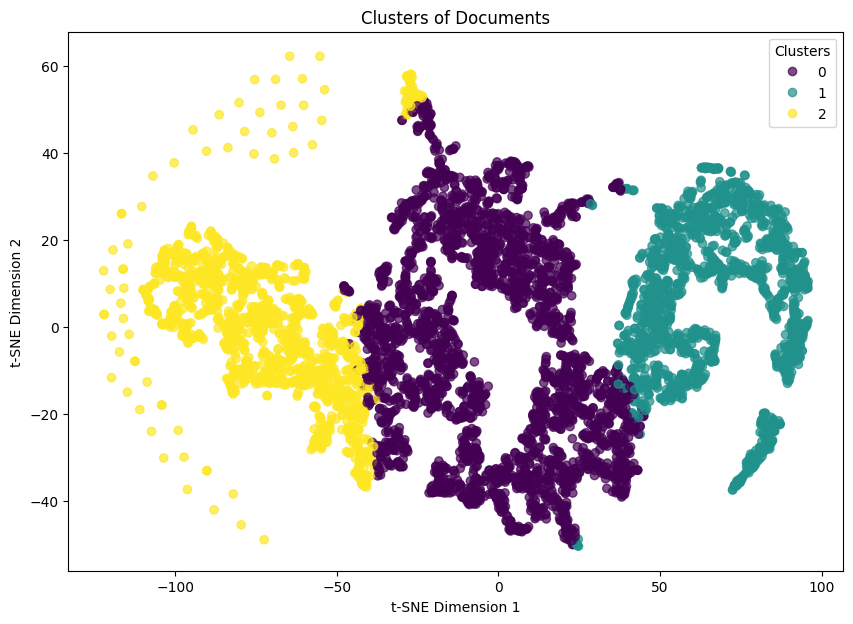

In [ ]:
#Reduce dimensions to 2 using t-SNE
tsne = TSNE(n_components=2,)
X_tsne = tsne.fit_transform(X)

#plot the data and clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df2['label'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters of Documents')
plt.show()

## b.
[10%] Lakukan persona analysis untuk cluster yang anda hasilkan, jelaskan informasi yang anda peroleh mengenai cluster tersebut berdasarkan personanya.

See cluster characterizations

In [ ]:
for cluster in range(3):
    print("Tweets in Cluster", cluster, "\n")
    print(df2[df2['label'] == cluster]['Tweet'].head(10))

Tweets in Cluster 0 

0     @myrnn_ @secgron @bankbsi_id sistem sama orang...
1     @setyodiwantoro @ZakyFarid @RochmatPurwanto @b...
2     @Kebosananan @detikcom iya nasabah bank konven...
7                                Bank jelek @bankbsi_id
8     Mau sampe kapan klen error' @bankbsi_id. Tiap ...
10    @micahhhh1_ @secgron @bankbsi_id Iya ini kobis...
13    @BirEng81 @bankbsi_id @BKFKemenkeu @ojkindones...
14    @smgalucky @bankbsi_id Biasa nya ga selama ini...
15    @bankbsi_id udah atm abis ilang, mbanking gabi...
19    @bankbsi_id min, bsi mobile masih gangguan? Sa...
Name: Tweet, dtype: object
Tweets in Cluster 1 

5     @bankbsi_id normal apaan, semalem mo tarik tun...
6     @tarocookiess Wes bener bener dadi kampus obam...
9     @LelaMelani10 @paijodirajo @bankbsi_id Lol ini...
11          @RioDFM @bankbsi_id 3 hari bang, kocak emng
12    @AhmadShiddiqN Bisaa, tapi transfernya antar b...
16    @YustiawanIhsan2 @putraesaaa @evylagi @Rochmat...
22    @TampahHiburan @0xbabayagaa

In [ ]:
for cluster in range(3):
    cluster_data = df2[df2['label'] == cluster]
    all_words = ' '.join(cluster_data['Tweet']).split()
    common_words = Counter(all_words).most_common(10)
    print("Common words in Cluster", cluster, ":")
    print(common_words)

Common words in Cluster 0 :
[('@bankbsi_id', 2684), ('bisa', 1006), ('di', 724), ('BSI', 646), ('ini', 591), ('bank', 586), ('ke', 561), ('yg', 444), ('ada', 432), ('ga', 373)]
Common words in Cluster 1 :
[('@bankbsi_id', 1354), ('di', 350), ('bisa', 294), ('BSI', 244), ('ini', 235), ('dan', 226), ('bank', 198), ('yang', 191), ('ada', 189), ('ke', 163)]
Common words in Cluster 2 :
[('@bankbsi_id', 1371), ('bisa', 571), ('BSI', 261), ('di', 248), ('bank', 242), ('ini', 208), ('bsi', 195), ('ke', 191), ('belum', 190), ('ga', 174)]


# Persona analysis of clusters   
### Cluster 0 :    
Kata kunci: @bankbsi_id, bisa, di, BSI, bank, ke, yg, ada, ga

Topik cluster: Keluhan mengenai layanan yang tidak tersedia di Bank

Cluster ini memiliki karakteristik tweet mengenai pertanyaan atau keluhan mengenai layanan yang tidak tersedia di Bank
### Cluster 1 :    
Kata kunci: @bankbsi_id, di, bisa, BSI, ini, dan, bank, yang, ada, ke

Topik cluster: Keluhan mengenai layanan yang down di Bank

Cluster ini memiliki karakteristik tweet mengenai keluhan atau ketidakpuasan pelanggan mengenai jasa pelayanan di Bank

### Cluster 2 :    
Kata kunci: @bankbsi_id, bisa, BSI, di, bank, ini, bsi, ke, belum, ga

Topik cluster: Pertanyaan mengenai kesediaan transfer Bank

Cluster ini memiliki karakteristik tweet mengenai pertanyaan mengenai kesediaan pelayanan transfer di bank

## c.
[15%] Anda tertarik untuk membandingkan hasil clustering dengan metode lain yaitu topic extraction, sehingga anda perlu melakukan pemodelan topic extraction. Jelaskan metode topic extraction yang anda lakukan

Prepare X for LDA

In [ ]:
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X_new = vectorizer.fit_transform(df2['clean'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Topic extraction using LDA (Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(X_new)

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("\n")

# We only take the first 15 words of a tweet
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, n_top_words)

Topic #1:
bankbsiid ga bsi saldo masuk nya transfer bank gimana ya yg secgron min gak rekening


Topic #2:
bankbsiid bsi ya udah bank aja atm min mobile kak gak yg ka coba cek


Topic #3:
bsi bank bankbsiid syariah nasabah yg data indonesia rochmatpurwanto nya lockbit kena ransomware dm sistem




##  d.
[10%] Lakukan persona analysis kembali untuk topik yang anda peroleh, bandingkan apa yang anda peroleh dari pendekatan clustering dan topic extraction. Paparkan hal-hal menarik yang berhasil anda ekstrak.


Topic 1: Mengenai kendala layanan bank, seperti kesulitan transfer

Topic 2: Mengenai keluhan atau ketidakpuasan pelanggan

Topic 3: Mengenai ketidaksediaan pelayanan

Secara keseluruhan, topic yang dibuat pada LDA, memiliki kemiripan dengan cluster yang dibuat. Misalnya cluster 0 dan topik 1 yang sama-sama tentang kendala di bank serta cluster 1 dan topik 2 mengenai keluhan atas ketidakpuasan pelanggannya. Karena itu, clustering memiliki kemiripan yang cukup tinggi dengan topic extraction, namun clustering lebih mudah untuk memvisualisasi data dan melihat kemiripannya melalui koordinat euc